## Visualizing CHC Residue Conservation

### Residue MSA Sites:
- K1326 (site 3258)
- K1415 (site 3347)

In [27]:
from Bio import AlignIO 
import matplotlib.pyplot as plt 
import numpy as np 

clade_fasta_paths = {
    'Alloascoideaceae': './data/CHC1-fastas-by-clade/Alloascoideaceae_aligned_CHCs.fasta',
    'CUG-Ala': './data/CHC1-fastas-by-clade/CUG-Ala_aligned_CHCs.fasta',
    'CUG-Ser1': './data/CHC1-fastas-by-clade/CUG-Ser1_aligned_CHCs.fasta',
    'CUG-Ser2': './data/CHC1-fastas-by-clade/CUG-Ser2_aligned_CHCs.fasta',
    'Dipodascaceae_Trichomonascaceae': './data/CHC1-fastas-by-clade/Dipodascaceae_Trichomonascaceae_aligned_CHCs.fasta',
    'Lipomycetaceae': './data/CHC1-fastas-by-clade/Lipomycetaceae_aligned_CHCs.fasta',
    'Phaffomycetaceae': './data/CHC1-fastas-by-clade/Phaffomycetaceae_aligned_CHCs.fasta',
    'Pichiaceae': './data/CHC1-fastas-by-clade/Pichiaceae_aligned_CHCs.fasta',
    'Saccharomycetaceae': './data/CHC1-fastas-by-clade/Saccharomycetaceae_aligned_CHCs.fasta',
    'Saccharomycodaceae': './data/CHC1-fastas-by-clade/Saccharomycodaceae_aligned_CHCs.fasta',
    'Sporopachydermia-clade': './data/CHC1-fastas-by-clade/Sporopachydermia-clade_aligned_CHCs.fasta',
    'Trigonopsidaceae': './data/CHC1-fastas-by-clade/Trigonopsidaceae_aligned_CHCs.fasta'
}

res_site_dict = {
    'K1326': 3258,
    'K1415': 3347
}

### Connor's code for reference (modified)

In [41]:
def aa_from_alignment(aln, aa_list, res_site_dict):
    n_rows = len(aln)  
    n_cols = len(aa_list)
   
    cons_data_all = {} 

    print(f"Alignment has {n_rows} rows and {n_cols} key residues.") 
    
    for key_res, key_res_ind in res_site_dict.items():

        columns = aln[:, key_res_ind - 1]
        
        cons_data_key_res = np.zeros((n_rows,n_cols),dtype=int)

        for ii, aa in enumerate(columns):
            for kk, aa_key in enumerate(aa_list):
                if aa == aa_key:
                    cons_data_key_res[ii, kk] = 1

        cons_data_all[key_res] = cons_data_key_res

    print(cons_data_all)
    return cons_data_all

Alignment has 6 rows and 22 key residues.
{'K1326': array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'K1415': array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}


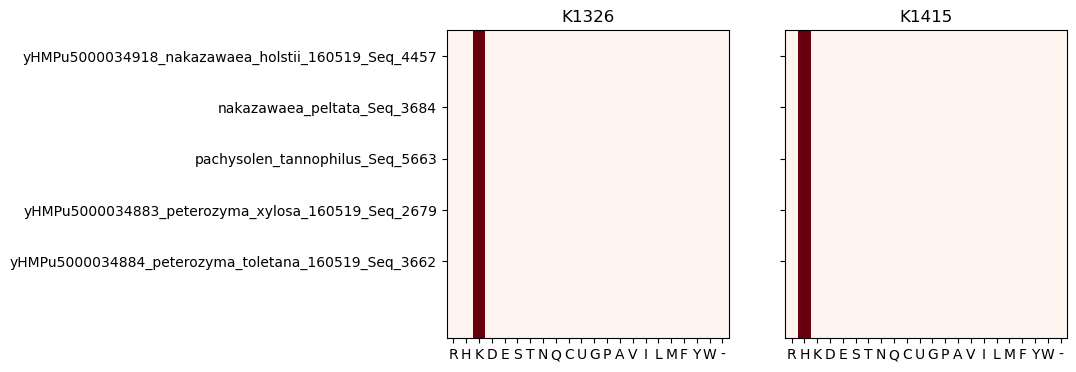

In [42]:
protein_list = []
for record in aln:
    protein_list.append(record.id)

test_aln = AlignIO.read('./data/fastas-by-clade/Trigonopsidaceae_aligned_CHCs.fasta', 'fasta')
cons_data_all = aa_from_alignment(test_aln, aa_list, res_site_dict)

#Plot Conservation of Residue 
fig, axarr = plt.subplots(1,2, figsize=(8,4), sharey=True) 


for jj, (key_res, key_res_ind) in enumerate(res_site_dict.items()):

    ax = axarr.flatten()[jj]
    
    im = ax.imshow(cons_data_all[key_res], cmap = 'Reds', aspect='auto') 
      
    
    ax.set_xticks(np.arange(len(aa_list))) 
    ax.set_yticks(np.arange(len(aln))) 
    ax.set_xticklabels(aa_list) 
    ax.set_yticklabels(protein_list) 
    ax.set_title(key_res) 
      
fig.subplots_adjust(hspace=.3) 

### Clade data collection

In [28]:
def clade_residue_conservation(clade_fasta_paths, res_site_dict):
    aa_list = 'RHKDESTNQCUGPAVILMFYW'
    total_clades_arrays_dict = {}
    n_species_per_clade = []
    
    for clade_name, fasta_path in clade_fasta_paths.items():
        aligned_fasta = AlignIO.read(fasta_path, 'fasta')
        n_rows = len(aligned_fasta)
        n_cols = len(aa_list)
        n_species_per_clade.append(n_rows)

        clade_arrays_dict = {}
        for res, res_pos in res_site_dict.items():
            site = aligned_fasta[:, res_pos - 1]
            multi_species_arr = np.zeros([n_rows, n_cols], dtype='int64')

            for i, aa in enumerate(site):
                for k, aa_key in enumerate(aa_list):
                    if aa == aa_key:
                        multi_species_arr[i, k] = 1

            compressed_arr = multi_species_arr.sum(axis=0)
            clade_arrays_dict[res] = compressed_arr

        total_clades_arrays_dict[clade_name] = clade_arrays_dict

    return total_clades_arrays_dict, n_species_per_clade

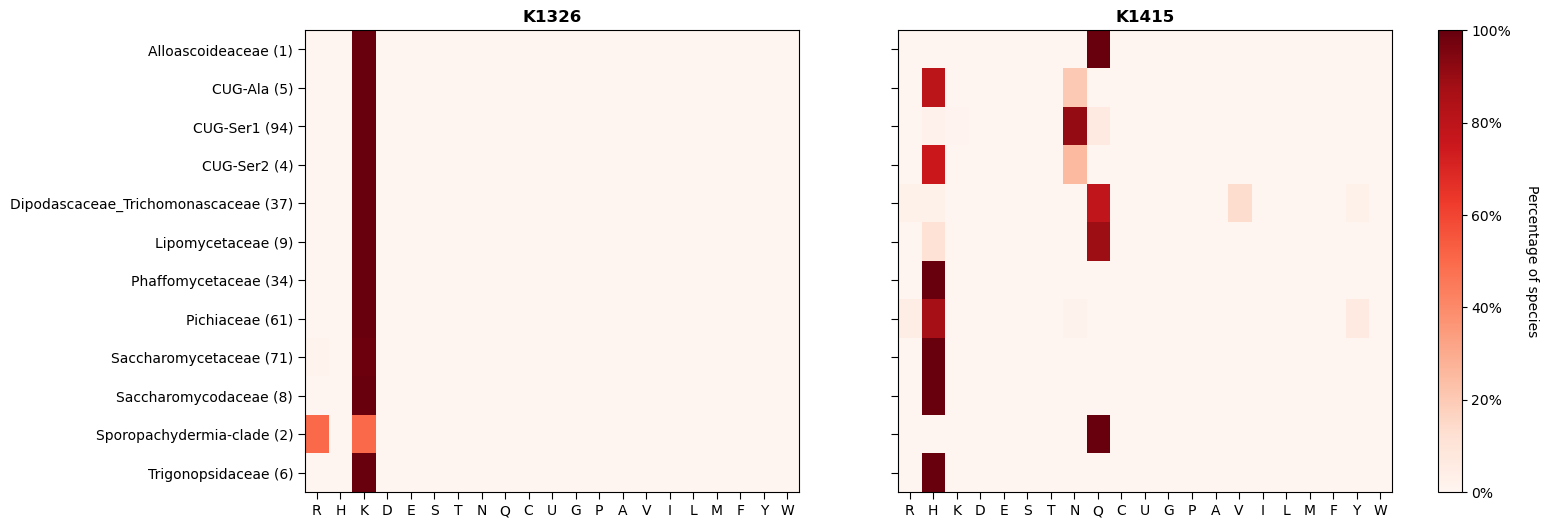

In [39]:
from matplotlib.ticker import PercentFormatter

total_clades_arrays_dict, n_species_per_clade = clade_residue_conservation(clade_fasta_paths, res_site_dict)

aa_list = 'RHKDESTNQCUGPAVILMFYW'
aa_indices = list(range(len(aa_list)))

clade_names = list(total_clades_arrays_dict.keys())
res_names = list(res_site_dict.keys())
n_clades = len(clade_names)
n_res = len(res_names)
n_aa = len(aa_list)

res_matrices = {res: [] for res in res_names} # Initializes the data containers for each residue site

for clade in clade_names:
    clade_data = total_clades_arrays_dict[clade]
    for res in res_names:
        compressed_arr = clade_data[res]
        total = compressed_arr.sum()
        if total == 0:
            normalized_arr = np.zeros(n_aa)
        else:
            normalized_arr = compressed_arr / total
        res_matrices[res].append(normalized_arr)

fig, axes_obj_arr = plt.subplots(1, n_res, figsize=(15, 6), sharey=True)
im = None
for i, res in enumerate(res_names):
    res_matrix = np.array(res_matrices[res]) # Turns all the 1-dimensional np arrays in each res_matrices dict value into one large array of all normalized/heatmap values
    axes_obj = axes_obj_arr[i] if n_res > 1 else ax_obj_arr

    im = axes_obj.imshow(res_matrix, cmap='Reds', aspect='auto', vmin=0, vmax=1)

    axes_obj.set_xticks(aa_indices)
    axes_obj.set_xticklabels(aa_list, fontsize=10)
    axes_obj.set_yticks(np.arange(n_clades))
    #axes_obj.set_yticklabels(clade_names, fontsize=10)
    ytick_labels = [f'{clade} ({n})' for clade, n in zip(clade_names, n_species_per_clade)]
    axes_obj.set_yticklabels(ytick_labels, fontsize=10)
    axes_obj.set_title(res, fontsize=12, fontweight='bold')
    axes_obj.tick_params(axis='both', which='both', length=5)

    # Connor may or may not use the grids in his publication, so keep them commented here in case.
    #for x_pos in aa_indices:
    #    axes_obj.axvline(x=x_pos - 0.5, color='gray', linewidth=0.5, linestyle='--', alpha=0.4)

    #for y_pos in np.arange(n_clades):
    #    axes_obj.axhline(y=y_pos - 0.5, color='gray', linewidth=0.5, linestyle='--', alpha=0.4)

cbar = fig.colorbar(im, ax=axes_obj_arr, orientation='vertical', fraction=0.025, pad=0.04)
cbar.ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
cbar.set_label('Percentage of species', rotation=270, labelpad=20)

plt.show()